In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('imdb_ratings.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67408 entries, 0 to 67407
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     67408 non-null  int64  
 1   titleId        67408 non-null  object 
 2   title          67408 non-null  object 
 3   averageRating  67408 non-null  float64
 4   numVotes       67408 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [3]:
most_voted_df = df.sort_values(by='numVotes', ascending= False).head(10)
most_voted_df

,Unnamed: 0,titleId,title,averageRating,numVotes
44770,44771,tt1345836,The Dark Knight Rises,8.4,1515727
35182,35182,tt1130884,Shutter Island,8.2,1129155
18956,18956,tt0088763,Back to the Future,8.5,1057549
17122,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081
46801,46802,tt7286456,Joker,8.5,937904
30889,30889,tt1049413,Up,8.2,935115
45611,45612,tt1392190,Mad Max: Fury Road,8.1,881816
45608,45609,tt1392170,The Hunger Games,7.2,844312
18599,18599,tt0088247,The Terminator,8.0,799595
28587,28587,tt1010048,Slumdog Millionaire,8.0,798653


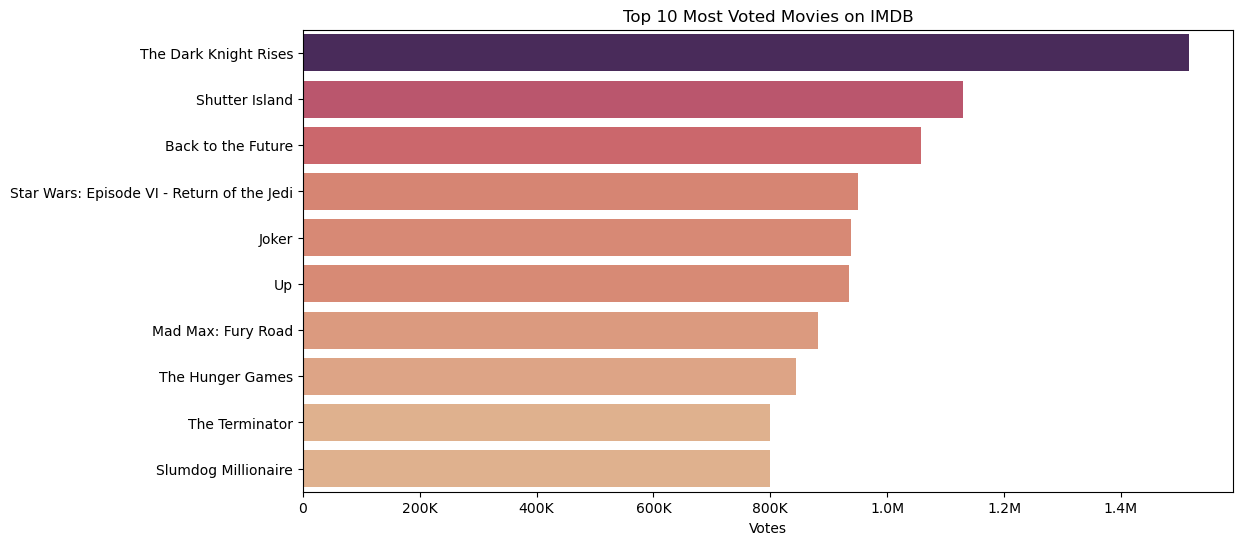

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(data=  most_voted_df,
            x= 'numVotes',
            y= 'title',
            hue= 'numVotes',
            palette= 'flare',
            legend= False
            )
plt.title('Top 10 Most Voted Movies on IMDB')
plt.xlabel('Votes')
plt.ylabel('')

def xticks_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

ticks_x  =  plt.FuncFormatter(xticks_format)
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [5]:
highest_rated_df = df[df['numVotes'] > 1000].sort_values(by='averageRating', ascending= False).head(10)
highest_rated_df

,Unnamed: 0,titleId,title,averageRating,numVotes
58102,58103,tt8560994,Friday Five Sharp,9.9,2685
40057,40057,tt1216109,Wilson's Heart,9.8,7731
40056,40056,tt1216108,House's Head,9.8,8267
50480,50481,tt7678620,Bluey,9.7,2037
64877,64878,tt9471404,The Chosen,9.7,12433
27629,27629,tt0705272,Pine Barrens,9.7,7220
32274,32274,tt10731210,A Summer Story,9.7,1273
27062,27062,tt0583433,The Last One,9.7,12123
41470,41470,tt1248736,Stress Relief,9.7,9716
37252,37252,tt11620828,Threat Level Midnight: The Movie,9.7,1862


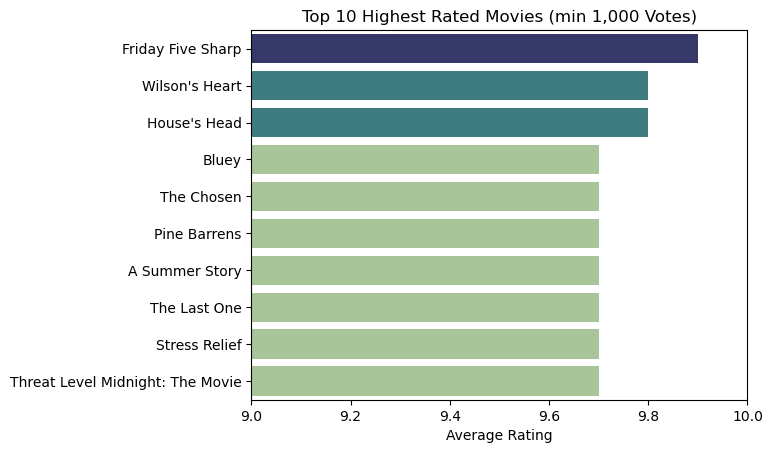

In [6]:
sns.barplot(data=highest_rated_df,
            x='averageRating',
            y='title',
            hue='averageRating',
            palette='crest',
            legend=False)

plt.xlim(9,10)
plt.title('Top 10 Highest Rated Movies (min 1,000 Votes)')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.show()

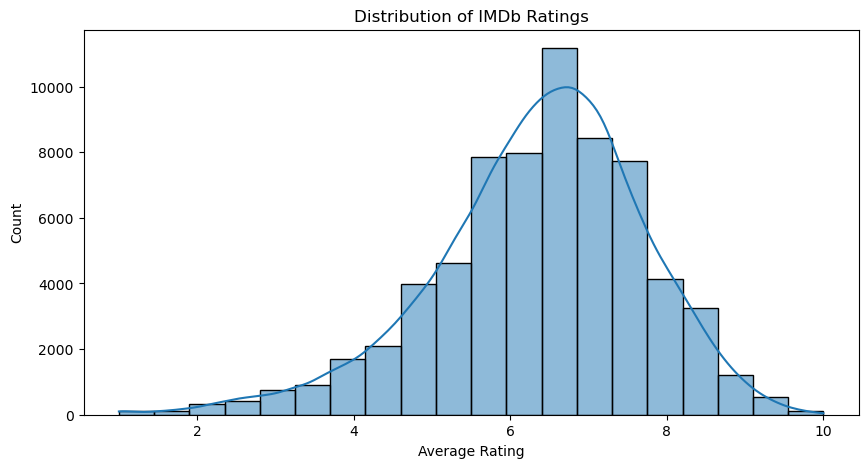

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['averageRating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

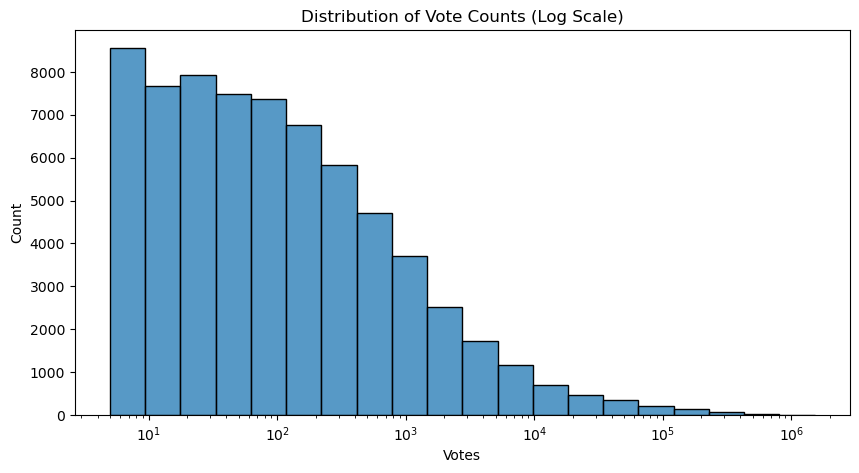

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['numVotes'], bins=20, log_scale=True)
plt.title('Distribution of Vote Counts (Log Scale)')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.show()

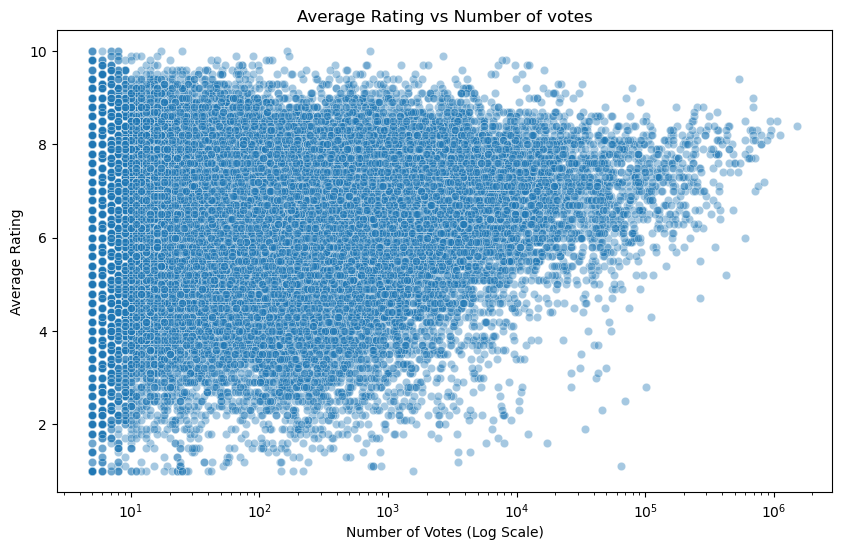

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='numVotes',
    y='averageRating',
    alpha= 0.4
)
plt.xscale('log')
plt.title('Average Rating vs Number of votes')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Average Rating')
plt.show()

In [10]:
df['popularity'] = np.log(df['numVotes'] + 1) * (df['averageRating'] / 10)
df['popularity'] = ((df['popularity'] - df['popularity'].min())/
                    (df['popularity'].max() - df['popularity'].min())
                    * 100)
most_popular = df.sort_values(by='popularity', ascending=False).head(10)
most_popular


,Unnamed: 0,titleId,title,averageRating,numVotes,popularity
47561,47562,tt7366338,Chernobyl,9.4,536082,100.000000
7014,7014,tt0050083,12 Angry Men,9.0,689432,97.534974
44770,44771,tt1345836,The Dark Knight Rises,8.4,1515727,96.349500
14775,14775,tt0060196,"Il buono, il brutto, il cattivo",8.8,688070,95.320712
18956,18956,tt0088763,Back to the Future,8.5,1057549,95.010566
46801,46802,tt7286456,Joker,8.5,937904,94.175533
35182,35182,tt1130884,Shutter Island,8.2,1129155,92.045089
17122,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,92.012748
10198,10198,tt0054215,Psycho,8.5,603950,91.114231
30889,30889,tt1049413,Up,8.2,935115,90.779964


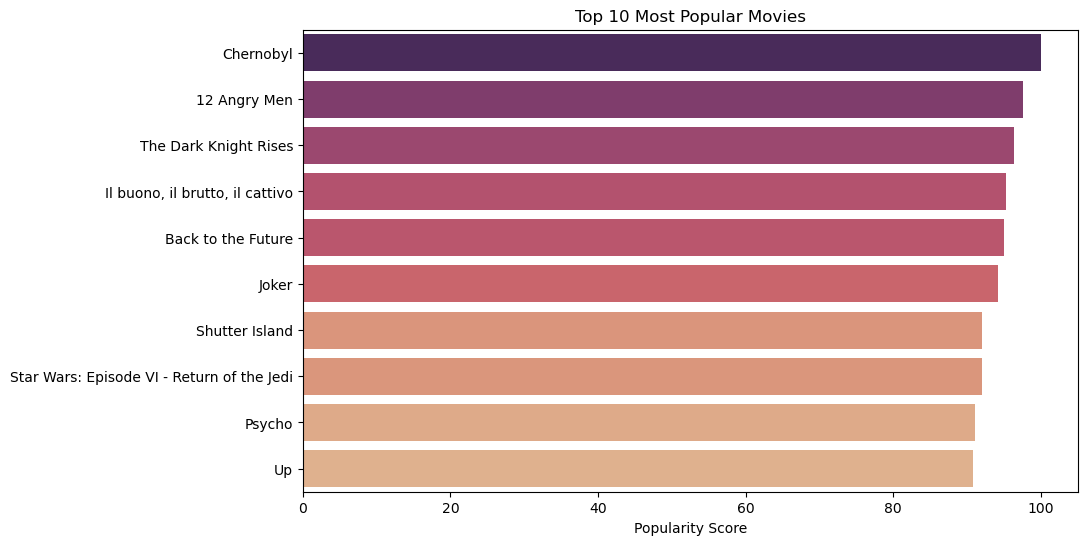

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_popular,
            x='popularity',
            y='title',
            hue='popularity',
            palette='flare',
            legend=False)
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity Score')
plt.ylabel('')
plt.show()

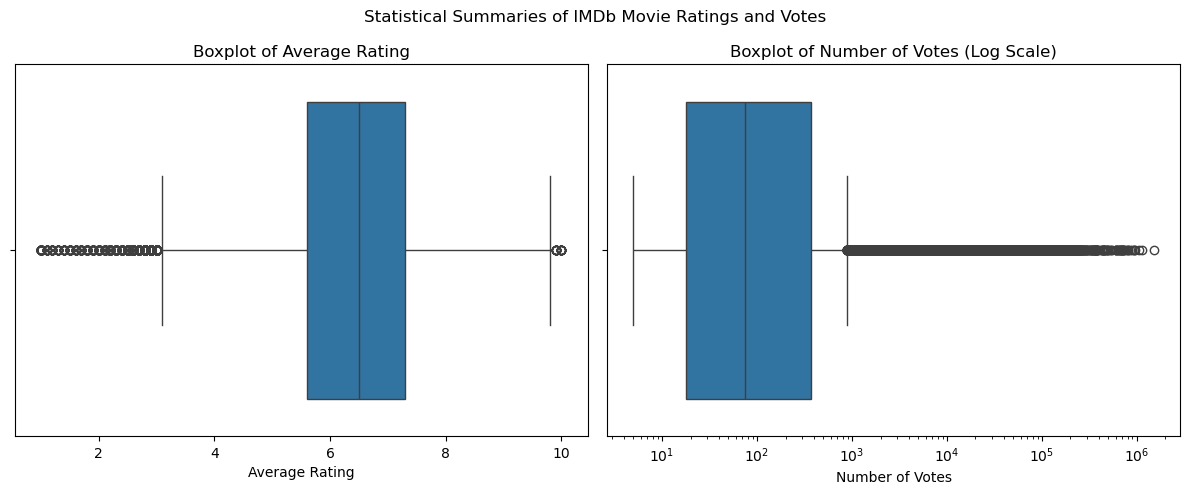

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df["averageRating"])
plt.title("Boxplot of Average Rating")
plt.xlabel("Average Rating")

plt.subplot(1,2,2)
sns.boxplot(x=df["numVotes"])
plt.xscale("log")
plt.title("Boxplot of Number of Votes (Log Scale)")
plt.xlabel("Number of Votes")

plt.suptitle("Statistical Summaries of IMDb Movie Ratings and Votes")
plt.tight_layout()
plt.show()